<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Quadrature

**Goal:** Evaluate integrals

$$ \int^b_a f(x) dx$$

 - Many integrals do not have closed form solutions
 
   $$ \int^b_a \sqrt{1 + \cos^2 x} dx$$

 - Solution to ordinary differential equations
   
   $$\frac{\text{d}^2 u}{\text{d}t^2} = f\left(u, \frac{\text{d} u}{\text{d}t}, t \right)$$
   
   Defining $v = \frac{\text{d} u}{\text{d}t}$ then leads to

   $$\begin{bmatrix}
   \frac{\text{d} v}{\text{d}t} \\ \frac{\text{d} u}{\text{d}t} \end{bmatrix} = \begin{bmatrix} f(u, v, t) \\ v \end{bmatrix}$$
   
   which can be solved by integration
   
   $$\begin{bmatrix}
   v \\ u \end{bmatrix} = \begin{bmatrix} v(t_0) + \int^t_{t_0} f(u, v, \hat{t}) d\hat{t} \\ u(t_0) + \int^t_{t_0} v d\hat{t} \end{bmatrix}$$  
   
 - Solving partial differential equations

## Riemann Sums

Given $f(x)$ and a partition of the interval $[a,b]$ with $\{x_i\}^N_{i=0}$ and $a = x_0 < x_1 < \ldots < x_N = b$ and $x^*_i \in [x_i, x_{i+1}]$ we define the Riemann integral as

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

This is a general definition and leads to a number of quadrature approaches based on how we pick $x_i^* \in [x_i, x_{i+1}]$.

### Midpoint Rule

Choose $x_i^*$ such that

$$x_i^* = \frac{x_{i+1} + x_i}{2}$$

so that

$$I[f] = \int^b_a f(x) dx \approx \sum^{N-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = Q_m[f]$$

over $\Delta x_i = x_{i+1} - x_i$ 

$$Q_m[f] = \Delta x f\left(\frac{\Delta x}{2} \right )$$

#### Example:  Integrate using midpoint rule

Calculate and illustrate the midpoint rule.  Note that we are computing the cummulative integral here:

$$\int^x_0 sin(\hat{x}) d\hat{x} = -\cos \hat{x} |^x_0 = 1 - \cos x$$

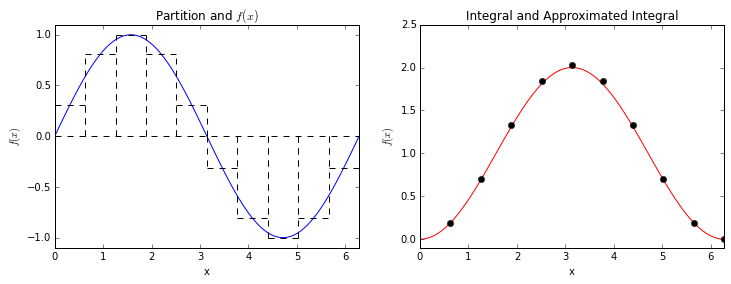

In [2]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
If = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = fig.add_subplot(1, 2, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in xrange(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

Qf = numpy.zeros(x_star.shape)
Qf[0] = f(x_star[0]) * delta_x
for i in xrange(1, num_partitions):
    Qf[i] = Qf[i - 1] + f(x_star[i]) * delta_x
    
axes = fig.add_subplot(1, 2, 2)

axes.plot(x, If(x), 'r')
# Offset due to indexing above
axes.plot(x_star + delta_x / 2.0, Qf, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()
    


## Quadrature

A method to evaluate $I[f]$ using a discrete, finite number of function evaluations:

$$Q[f] = \sum^M_{i=0} w_i f(x_i)$$

where $w_i$ are weights.  A particular quadrature method will specify the weights $w_i$ and the points $x_i$ to evaluate the function $f(x)$ at.

### Error Analysis

Define the error $E[f]$ such that

$$I[f] = Q[f] + E[f]$$

The degree of $Q[f]$ is the integer $n$ such that $E[p_i] = 0~~~ \forall i \leq n$ and $\exists p_{n+1}$ such that $E[p_{n+1}] \neq 0$.

### Newton-Cotes Quadrature

Using $N+1$ equally spaced points, evaluate $f(x)$ at these points and exactly integrate the interpolating polynomial:

$$Q[f] = \int^b_a P_N(x) dx$$

### Trapezoidal Rule

Trapezoidal rule uses $N = 1$ order polynomials between each point (i.e. piece-wise defined linear polynomials).  The coefficients of the polynomial in each interval are

$$p_0 = f(x_i) ~~~~~ p_1 = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}$$

which gives the interpolating polynomial

$$p_1(x) = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} ( x- x_i) + f(x_i)$$

Integrating this polynomial we have

$$Q[f] = \int^{x_{i+1}}_{x_i} (p_0 + p_1 (x - x_i)) dx = \left . p_0 x + p_1 \left (\frac{x^2}{2} - x_i x\right) \right |^{x_{i+1}}_{x_i}$$

$$= p_0 \Delta x + p_1 \left (\frac{1}{2} (x_{i+1} + x_i) \Delta x - x_i \Delta x\right) $$

$$= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i))\left (\frac{1}{2} (x_{i+1} + x_i) - x_i\right) $$

$$= f(x_i) \Delta x + (f(x_{i+1}) - f(x_i)) \frac{\Delta x}{2} $$

$$= \frac{\Delta x}{2} (f(x_{i+1}) + f(x_i))  $$

We can also simplify the sum over all the intervals by noting that all but the end points will have total contribution of $\Delta x$ to the entire sum such that

$$Q[f] = \frac{\Delta x}{2} (f(x_0) + f(x_N) ) + \sum^{N-1}_{j=1} \Delta x f(x_j)$$

This is known as the composite trapezoidal rule.

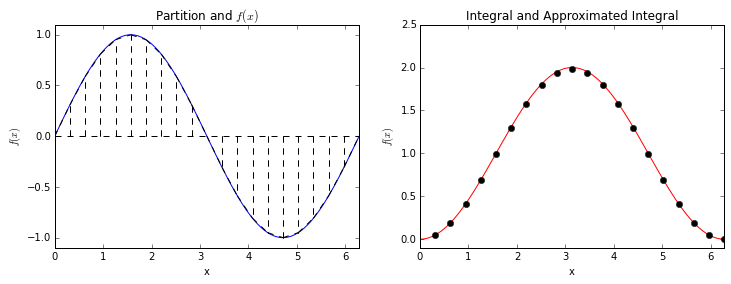

In [3]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
If = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 20
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = fig.add_subplot(1, 2, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in xrange(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i+1])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_hat[i]), f(x_hat[i+1])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

Qf = numpy.zeros(x_hat.shape)
Qf[0] = (f(x_hat[1]) + f(x_hat[0])) * delta_x / 2.0
for i in xrange(1, num_partitions):
    Qf[i] = Qf[i - 1] + (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x / 2.0
    
axes = fig.add_subplot(1, 2, 2)

axes.plot(x, If(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, Qf, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()
    



### Simpson's Rule

Simpson's rule uses $N = 2$ order polynomials between each point (i.e. piece-wise defined quadratic polynomials).  The polynomial has the form

$$P_2(x) = \frac{2 f(x_i)}{\Delta x^2} \left (x - \frac{\Delta x}{2} \right ) (x - \Delta x) - \frac{4 f\left(x_i + \frac{\Delta x}{2}\right)}{\Delta x^2}  x (x - \Delta x) + \frac{2 f(x_{i+1})}{\Delta x^2} x \left (x - \frac{\Delta x}{2} \right )$$

Integrating this polynomial we have

$$Q[f] = \int^{x_{i+1}}_{x_i} P_2(x) dx = \frac{\Delta x}{6} f(x_i) + \frac{2 \Delta x}{3} f\left(x_i + \frac{\Delta x}{2} \right ) + \frac{\Delta x}{6} f(x_{i+1})$$

We can also show this by using the method of undetermined coefficients.  Use general form of quadrature rule and deterimine weights $w_j$ by using functions we know the solution to.  These functions can be any representation of polynomials up to order $N=2$ however the monomials $1$, $x$, $x^2$ are the easiest in this case.

$$Q_{\Delta x}[f] = w_0 f(0) + w_1 f(\Delta x / 2) + w_2 f(\Delta x)$$

$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{\Delta x}_{0} 1 dx = \Delta x & & Q[1] &= w_0 + w_1 + w_2 \\
    &\text{if}~f = x:  &I[f] =  \int^{\Delta x}_{0} x dx = \frac{\Delta x^2}{2} & & Q[x] &= w_1 \frac{\Delta x}{2} + w_2\Delta x\\
    &\text{if}~f = x^2:  &I[f] =  \int^{\Delta x}_{0} x^2 dx = \frac{\Delta x^3}{3} & & Q[x^2] &= \frac{\Delta x^2}{4} w_1 + w_2\Delta x^2\\
\end{aligned}$$

We then have the system of equations:
$$\begin{aligned}
    w_0 &+& w_1 &+& w_2 &=\Delta x \\
        &~& \frac{\Delta x}{2} w_1 &+& \Delta x w_2  &= \frac{\Delta x^2}{2} \\
        &~& \frac{\Delta x^2}{4} w_1 &+& \Delta x^2 w_2 &=\frac{\Delta x^3}{6} \\
\end{aligned}$$

or

$$\begin{bmatrix}
    1 & 1 & 1 \\
    0 & \Delta x / 2 & \Delta x \\
    0 & \Delta x^2 / 4 & \Delta x^2 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x^2 / 2 \\ \Delta x^3 / 3
\end{bmatrix} \Rightarrow \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 1 / 4 & 1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x / 2 \\ \Delta x / 3
\end{bmatrix} \Rightarrow \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 0 & -1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \begin{bmatrix} 
    \Delta x \\ \Delta x / 2 \\ -\Delta x / 6
\end{bmatrix}$$

Leading to 

$$ w_2 = \frac{\Delta x}{6} ~~~~ w_1 = \frac{2}{3} \Delta x ~~~~ w_0 = \frac{\Delta x}{6}$$

Another way to write Simpson's rule is to use intervals of three points (similar to one of the ways we did this last time).  The formulation here effectively has a $\Delta x$ half of what the intervals show but is easier to program.

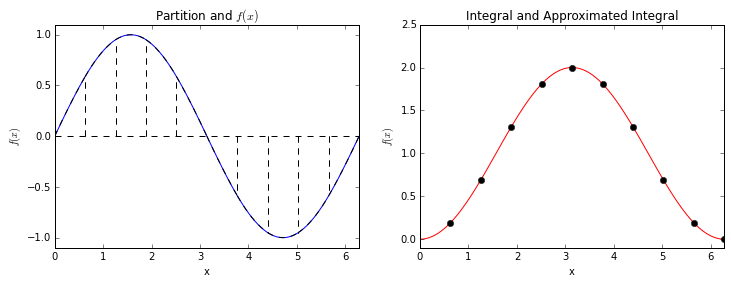

In [4]:
# Note that this calculates the cummulative integral from 0.0

f = lambda x: numpy.sin(x)
If = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = fig.add_subplot(1, 2, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in xrange(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i + 1])], 'k--')
    coeff = numpy.polyfit((x_hat[i], x_hat[i] + delta_x / 2.0, x_hat[i + 1]), 
                          (f(x_hat[i]), f(x_hat[i] + delta_x / 2.0), f(x_hat[i+1])), 2)
    x_star = numpy.linspace(x_hat[i], x_hat[i+1], 10)
    axes.plot(x_star, numpy.polyval(coeff, x_star), 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

Qf = numpy.zeros(x_hat.shape)
Qf[0] = delta_x * (1.0 / 6.0 * (f(x_hat[0]) + f(x_hat[1])) + 2.0 / 3.0 * f(x_hat[0] + delta_x / 2.0))
for i in xrange(1, num_partitions):
    Qf[i] = Qf[i - 1] + delta_x * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x / 2.0))
    
axes = fig.add_subplot(1, 2, 2)

axes.plot(x, If(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, Qf, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()
    




### Quadrature Accuracy

We can also use our polynomial analysis from before to analyze the errors made using both of the aforementioned methods.  From Lagrange's theorem we have the remainder term as before which we can use to look at the error

$$R_N(x) = (x - x_0)(x - x_1) \cdots (x- x_N) \frac{f^{(N+1)}(c)}{(N+1)!}$$

and integrate it to find the form and magnitude of the error on a single interval.  To find the total error we must sum the error over all the intervals:

$$I[f] = \sum_{i=0}^N \int^{x_{i+1}}_{x_i} P_N(x) dx + \sum_{i=0}^N \int^{x_{i+1}}_{x_i} R_N(x) dx = Q[f] + E[f]$$

as we defined before.

#### Trapezoidal error

With $N=1$ we have

$$R_1(x) = (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2}$$

Integrating this leads to

$$\int^{x_{i+1}}_{x_i} (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2} dx = \frac{\Delta x^3}{12} f''(c)$$

giving us a form for the error.  This was only for a single interval, if we sum up across all the intervals the total error is

$$E[f] = -\frac{\Delta x^3}{12} \sum_{i=0}^{N} f''(c_i)$$

or more illustrative

$$E[f] = -\frac{1}{2} \Delta x^2 (b - a) \left [ \frac{1}{N} \sum^{N-1}_{i=0} f''(c_i) \right ]$$

where the expression in the brackets is the mean value of the second derivative over the interval $[a,b]$.  This also shows that the trapezoidal rule converges quadratically as $\Delta x \rightarrow 0$.

#### Simpson's Rule Error

Similarly here we have $N = 2$ and 

$$R_2(x) = (x - x_i) \left(x - x_i - \frac{\Delta x}{2} \right) (x - x_{i+1}) \frac{f'''(c)}{3!}$$

Integrating and summing the error contributions we find

$$E[f] = -\frac{1}{180} (b - a) \Delta x^4 f^{(4)}(c)$$

Interestingly we have gained two orders of accuracy by increasing the polynomial order by only 1!


##### Example 1:

If $f(x) = \sin \pi x$ look at the relative accuracy of midpoint, trapezoidal and simpson's rules for a single interval $x\in[0,1]$.

$$\begin{aligned}
    \text{Exact:} ~ &I[f] &=& \int^1_0 \sin \pi x = \left . \frac{-\cos \pi x}{\pi} \right |^1_0 = \frac{2}{\pi} \approx 0.636619772 \\
    \text{Midpoint:} ~ &Q[f] &=& \Delta x f(1/2) = \sin (\pi / 2) = 1 \\
    \text{Trapezoid:} ~ &Q[f] &=& \frac{\Delta x}{2} (\sin(0) + \sin(\pi)) = 0 \\
    \text{Simpson's:} ~ &Q[f] &=& \frac{\Delta x}{6} \sin(0) + \frac{2 \Delta x}{3} \sin(\pi / 2) + \frac{\Delta x}{6} \sin(\pi) = \frac{2 \Delta x}{3} = \frac{2}{3}
\end{aligned}$$

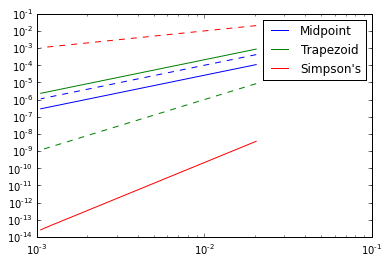

In [5]:
# Compute the error as a function of delta_x for each method
f = lambda x: numpy.sin(numpy.pi * x)

num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))
error_mid = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N)
    delta_x[j] = x_hat[1] - x_hat[0]

    # Compute Midpoint
    x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
    Qf = 0.0
    for i in xrange(0, N - 1):
        Qf += f(x_star[i]) * delta_x[j]
    error_mid[j] = numpy.abs(Qf - 2.0 / numpy.pi)
    
    # Compute trapezoid
    Qf = 0.0
    for i in xrange(1, N - 1):
        Qf += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(Qf - 2.0 / numpy.pi)
    
    # Compute simpson's    
    Qf = 0.0
    for i in xrange(0, N - 1):
        Qf += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(Qf - 2.0 / numpy.pi)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

# axes.plot(delta_x, error)
axes.loglog(delta_x, error_mid, label="Midpoint")
axes.loglog(delta_x, error_trap, label="Trapezoid")
axes.loglog(delta_x, error_simpson, label="Simpson's")
axes.loglog(delta_x, delta_x**1.0, 'r--')
axes.loglog(delta_x, delta_x**2.0, 'b--')
axes.loglog(delta_x, delta_x**3.0, 'g--')
axes.legend(loc=1)

plt.show()

### Recursive Improvement of Accuracy

Say we ran the trapezoidal rule with step size $2 \Delta x$, we then will have

$$\begin{aligned}
			\int^{x_2}_{x_0} f(x) dx  &= \frac{2 \Delta x}{2} (f_0 + f_2) =  h (f_0 + f_2) \Rightarrow \\
			\int^b_a f(x)dx &\approx Q_{2\Delta x}[f] = \sum^{N/2-1}_{j=0} \Delta x (f_{2j} + f_{2j+2}) \\
			&= \Delta x (f_{0} + f_{2})  + \Delta x (f_{2} + f_{4})  + \cdots + \Delta x (f_{N-2} + f_{N}) \\
			&= \Delta x\left ( f_0 + f_N +  2 \sum^{N/2-1}_{j=1} f_{2j} \right )
  \end{aligned}
$$

Now comparre the two rules for $\Delta x$ and $2 \Delta x$:

$$Q_{\Delta x}[f] = \frac{\Delta x}{2} \left (f_0 + f_N + 2 \sum^{N-1}_{j=1} f_j \right)~~~~~~~~~ Q_{2 \Delta x}[f] = \Delta x \left ( f_0 + f_N +  2 \sum^{N/2-1}_{j=1} f_{2j} \right )$$

$$Q_{\Delta x}[f] = \frac{1}{2} Q_{2\Delta x} + \Delta x(f_1 + f_3 + \cdots + f_{N-1})$$

Here we see we can actually reuse the work we did to calculate $Q_{2 \Delta x}[f]$ to refine the integral.

### Arbitrary Intervals (Affine Transforms)

Mapping $\xi \in [-1,1] \rightarrow x \in [a,b]$ can be done through an *affine transform* or *affine map* which is a linear transformation.

$$x = \underbrace{\frac{b - a}{2}}_{\text{scaling}} \xi + \underbrace{\frac{a+b}{2}}_{\text{translation}} ~~~~~ \text{or} ~~~~~ \xi = \left( x - \frac{a + b}{2}\right) \frac{2}{b-a}$$

$$\begin{aligned}
    I[f] &= \int^b_a f(x) dx = \int^1_{-1} f(x(\xi)) \frac{dx}{d\xi} d\xi = \frac{b - a}{2} \int^1_{-1} f(x(\xi)) d\xi\\
    Q[f] &= \sum_i w_i f(x(\xi_i)) \left . \frac{dx}{d\xi}\right|_{\xi_i}
\end{aligned}$$

## Optimal Quadrature Methods

Can we deterimine $Q_{\Delta x}[f]$ to maximize degree for a given number of function evaluations (points)?

### Generalized Gaussian Quadrature

Given $g(x) \in P_N(x)$ with roots $\{x_i\}^N_{i=1}$ we have

$$\int^1_{-1} w(x) x^i g(x) dx = 0 ~~~~ \forall i < N,$$

i.e. $g(x)$ is ortogonal to the $x^i$ with respect to the weight function $w(x)$, then there exists $\{w_i\}$ such that

$$\int^1_{-1} w(x) P_j(x) dx = \sum^N_{i=1} w_i P_j(x_i) ~~~~ \forall j \leq 2 N - 1$$

In other words, given a polynomial basis function and weight and ortogonality to all polynomials of order $i < N$ we can exactly integrate polynomials of order $2 N - 1$.  Choosing the correct weighting function and basis leads to a number of useful quarature approaches:

#### Gauss-Legendre

General Gauss-Legendre quadrature uses $w(x) = 1$ and $g(x) = \ell_N(x)$ which can be shown to have weights

$$w_i = \frac{2}{(1-x_i^2)(P'_n(x_i))^2}$$

and $x_i$ is the $i$th root of $\ell_N$.  The first few rules yield

<table width="80%">
    <tr align="center"><th>$$N$$</th> <th align="center">$$x_i$$</th> <th align="center"> $$w_i$$ </th></tr>
    <tr align="center"><td>$$1$$</td>           <td> $$0$$ </td> <td> $$2$$ </td> </tr>
    <tr align="center"><td>$$2$$</td>           <td> $$\pm \sqrt{\frac{1}{3}}$$ </td> <td> $$1$$ </td> </tr>
    <tr align="center"><td rowspan=2>$$3$$</td> <td> $$0$$ </td> <td> $$8/9$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \sqrt{\frac{3}{5}}$$ </td> <td> $$5/9$$</td> </tr>
    <tr align="center"><td rowspan=2>$$4$$</td> <td> $$\pm \sqrt{\frac{3}{7} - \frac{2}{7} \sqrt{\frac{6}{5}}}$$</td> <td> $$\frac{18 + \sqrt{30}}{36}$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \sqrt{\frac{3}{7} + \frac{2}{7} \sqrt{\frac{6}{5}}}$$</td> <td>$$\frac{18 - \sqrt{30}}{36}$$ </td> </tr>
    <tr align="center"><td rowspan=3>$$5$$</td> <td> $$0$$ </td> <td> $$\frac{128}{225}$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \frac{1}{3} \sqrt{5 - 2 \sqrt{\frac{10}{7}}}$$</td> <td> $$\frac{322 + 13\sqrt{70}}{900}$$</td> </tr>
    <tr align="center">                     <td> $$\pm \frac{1}{3} \sqrt{5 + 2 \sqrt{\frac{10}{7}}}$$</td> <td> $$\frac{322 - 13\sqrt{70}}{900}$$</td> </tr>
</table>

##### Example 2:  2-Point Gauss-Legendre Quadrature

Let $N=2$ on $x \in [-1,1]$

$$Q[f] = w_0 f(x_0) + w_1 f(x_1)$$

Using undetermined coefficients again we have

$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{1}_{-1} 1 dx = 2 & & Q[1] &= w_0 + w_1\\
    &\text{if}~f = x:  &I[f] =  \int^{1}_{-1} x dx = 0 & & Q[x] &= w_0 x_0 + w_1 x_1\\
    &\text{if}~f = x^2:  &I[f] =  \int^{1}_{-1} x^2 dx = \frac{2}{3} & & Q[x^2] &= w_0 x_0^2 + w_1 x_1^2\\
    &\text{if}~f = x^3:  &I[f] =  \int^{1}_{-1} x^3 dx = 0 & & Q[x^3] &= w_0 x_0^3 + w_1 x_1^3\\
\end{aligned}$$

$$\begin{aligned}
    &w_0 + w_1 = 2\\
    &w_0 x_0 + w_1 x_1 = 0\\
    &w_0 x_0^2 + w_1 x_1^2 = \frac{2}{3}\\
    &w_0 x_0^3 + w_1 x_1^3 = 0\\
\end{aligned}$$

Note that we need to solve for 4 unknowns $x_0$, $x_1$, $w_0$, and $w_1$.  Solving these equations leads to

$$x_0 = -\sqrt{\frac{1}{3}}, x_1 = \sqrt{\frac{1}{3}}  ~~~~~\text{and}~~~~~ w_0 = w_1 = 1 $$

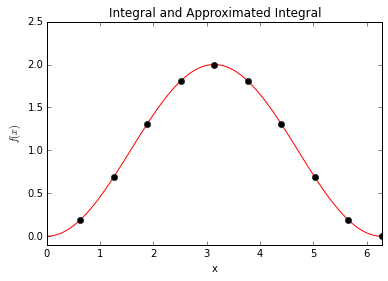

In [6]:
# Compute Gauss-Legendre based quadrature and affine transforms
f = lambda x: numpy.sin(x)
If = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
xi_0 = -numpy.sqrt(1.0 / 3.0)
xi_1 =  numpy.sqrt(1.0 / 3.0)
Qf = numpy.zeros(x_hat.shape)
Qf[0] = (f(xi_map(x_hat[0], x_hat[1], xi_0)) + f(xi_map(x_hat[0], x_hat[1], xi_1))) * delta_x / 2.0
for i in xrange(1, num_partitions):
    Qf[i] = Qf[i - 1] + (f(xi_map(x_hat[i], x_hat[i+1], xi_0)) + f(xi_map(x_hat[i], x_hat[i+1], xi_1))) * delta_x / 2.0
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, If(x), 'r')
# Offset due to indexing above
axes.plot(x_hat + delta_x, Qf, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))

plt.show()

#### Other Quadrature Families

 - Gauss-Chebyshev: If $w(x) = \frac{1}{\sqrt{1 - x^2}}$ and $g(x)$ are Chebyshev polynomials then we know the roots of the polynomials to be $x_i = \cos\left(\frac{2i-1}{2N} \pi \right)$ (the Chebyshev nodes) and we can derive that $w_i = \frac{\pi}{N}$.
 - Gauss-Hermite:  If $w(x) = e^{-x^2}$ and $g(x)$ are Hermite polynomials $H_i(x)$ then
   $$w_i = \frac{2^{N-1} N! \sqrt{\pi}}{N^2 (H_{N-1}(x_i))^2}$$

##### Example 3:

If $f(x) = e^x$ look at the relative accuracy of midpoint, trapezoidal, simpson and 2-point Gauss-Legendre quadrature for a single interval $x \in [-1,1]$.

$$\begin{aligned}
    \text{Exact:} ~ &I[f] &=& \int^1_{-1} e^x = \left . e^x \right |^1_{-1} = e - \frac{1}{e} \approx 2.350402387 \\
    \text{Midpoint:} ~ &Q[f] &=& 2 e^0 = 2 \\
    \text{Trapezoid:} ~ &Q[f] &=& \frac{2}{2} (e^{-1} + e^1) = e + \frac{1}{e} = 3.08616127 \\
    \text{Simpson's:} ~ &Q[f] &=& \frac{2}{6} e^{-1} + \frac{4}{3} e^0 + \frac{2}{6} e^1 = \frac{4}{3} + \frac{1}{3} (e^{-1} + e^1) \approx 2.362053757 \\
    \text{Gauss-Legendre:} ~ &Q[f] &=& e^{-\sqrt{\frac{1}{3}}} + e^{\sqrt{\frac{1}{3}}} \approx 2.342696088
\end{aligned}$$

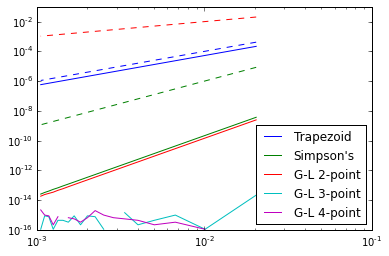

In [7]:
# Compute the error as a function of delta_x for each method
f = lambda x: numpy.sin(numpy.pi * x)
If = 2.0 / numpy.pi

num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))
error_2 = numpy.empty(len(num_partitions))
error_3 = numpy.empty(len(num_partitions))
error_4 = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    # Compute trapezoid
    Qf = 0.0
    for i in xrange(0, N - 1):
        Qf += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(Qf - If)
    
    # Compute simpson's    
    Qf = 0.0
    for i in xrange(0, N - 1):
        Qf += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(Qf - If)
    
    # Compute Gauss-Legendre 2-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(1.0 / 3.0), numpy.sqrt(1.0 / 3.0)]
    w = [1.0, 1.0]
    Qf = 0.0
    for i in xrange(0, N - 1):
        for k in xrange(len(xi)):
            Qf += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    Qf *= delta_x[j] / 2.0
    error_2[j] = numpy.abs(Qf - If)
    
    # Compute Gauss-Legendre 3-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3.0 / 5.0), 0.0, numpy.sqrt(3.0 / 5.0)]
    w = [5.0 / 9.0, 8.0 / 9.0, 5.0 / 9.0]
    Qf = 0.0
    for i in xrange(0, N - 1):
        for k in xrange(len(xi)):
            Qf += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    Qf *= delta_x[j] / 2.0
    error_3[j] = numpy.abs(Qf - If)
    
    # Compute Gauss-Legendre 4-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)), 
           numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
          -numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
           numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0))]
    w = [(18.0 + numpy.sqrt(30.0)) / 36.0, (18.0 + numpy.sqrt(30.0)) / 36.0,
         (18.0 - numpy.sqrt(30.0)) / 36.0, (18.0 - numpy.sqrt(30.0)) / 36.0]
    Qf = 0.0
    for i in xrange(0, N - 1):
        for k in xrange(len(xi)):
            Qf += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    Qf *= delta_x[j] / 2.0
    error_4[j] = numpy.abs(Qf - If)
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

# axes.plot(delta_x, error)
axes.loglog(delta_x, error_trap, label="Trapezoid")
axes.loglog(delta_x, error_simpson, label="Simpson's")
axes.loglog(delta_x, error_2, label="G-L 2-point")
axes.loglog(delta_x, error_3, label="G-L 3-point")
axes.loglog(delta_x, error_4, label="G-L 4-point")
axes.loglog(delta_x, delta_x**1.0, 'r--')
axes.loglog(delta_x, delta_x**2.0, 'b--')
axes.loglog(delta_x, delta_x**3.0, 'g--')
axes.legend(loc=4)

plt.show()

## SciPy Integration Routines

SciPy has a number of integration routines that we have derived here including general purpose integrators that can control error.

In [11]:
import scipy.integrate as integrate
integrate?